In [845]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

# Data collection and pre-processing

In [846]:
df=pd.read_csv("breast-cancer.csv") #Reading the dataset

In [847]:
df.head() #Print the first 5 rows from the dataset

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [848]:
#Drop ID column as it is not needed
df = df.drop('id', axis=1)

In [849]:
df.shape #569 rows and 31 columns

(569, 31)

In [850]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

* We have non-null values - no missing values. 


* All data types are float, diagnosis is object type (B/M).

In [851]:
#Another method to check for missing values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [852]:
#Statistical measures about the data:
#Checking Count for missing values
#Checking mean and std 
#25% of the data in each column are less than ... [Quartiles]
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [853]:
#Checking the distribution of target variable
#Maligenint -> cancerous
#Bengin -> non-cancerous
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

* Not much of a class imbalance 

<Axes: xlabel='diagnosis', ylabel='count'>

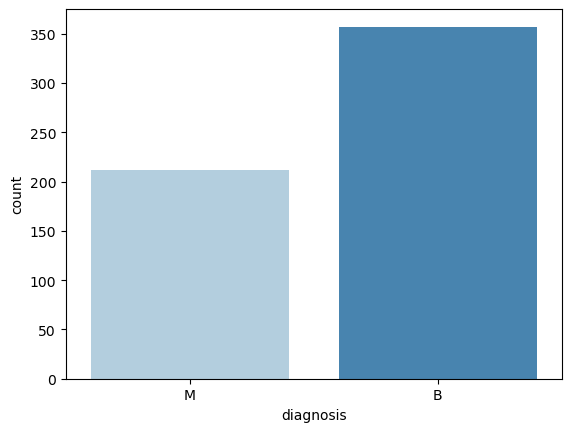

In [854]:
#Count plot figure 
sns.countplot(x='diagnosis', data=df, palette='Blues')

In [855]:
#Check for duplicate rows
duplicate_rows = df[df.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 31 columns]


In [856]:
#Convert target variable diagnosis (B/M) to (0/1)
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [857]:
df.groupby('diagnosis').mean()
#Malignant case all values are kind of greater than the B case 

radius_mean  texture_mean  perimeter_mean   area_mean  \
diagnosis                                                          
0            12.146524     17.914762       78.075406  462.790196   
1            17.462830     21.604906      115.365377  978.376415   

           smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                      
0                 0.092478          0.080085        0.046058   
1                 0.102898          0.145188        0.160775   

           concave points_mean  symmetry_mean  fractal_dimension_mean  ...  \
diagnosis                                                              ...   
0                     0.025717       0.174186                0.062867  ...   
1                     0.087990       0.192909                0.062680  ...   

           radius_worst  texture_worst  perimeter_worst   area_worst  \
diagnosis                                                              
0             13.379801      23.515070        87.005938   558.899440   
1             21.134811      29.318208       141.370330  1422.286321   

           smoothness_worst  compactness_worst  concavity_worst  \
diagnosis                                                         
0                  0.124959           0.182673         0.166238   
1                  0.144845           0.374824         0.450606   

           concave points_worst  symmetry_worst  fractal_dimension_worst  
diagnosis                                                                 
0                      0.074444        0.270246                 0.079442  
1                      0.182237        0.323468                 0.091530  

[2 rows x 30 columns]

<Axes: >

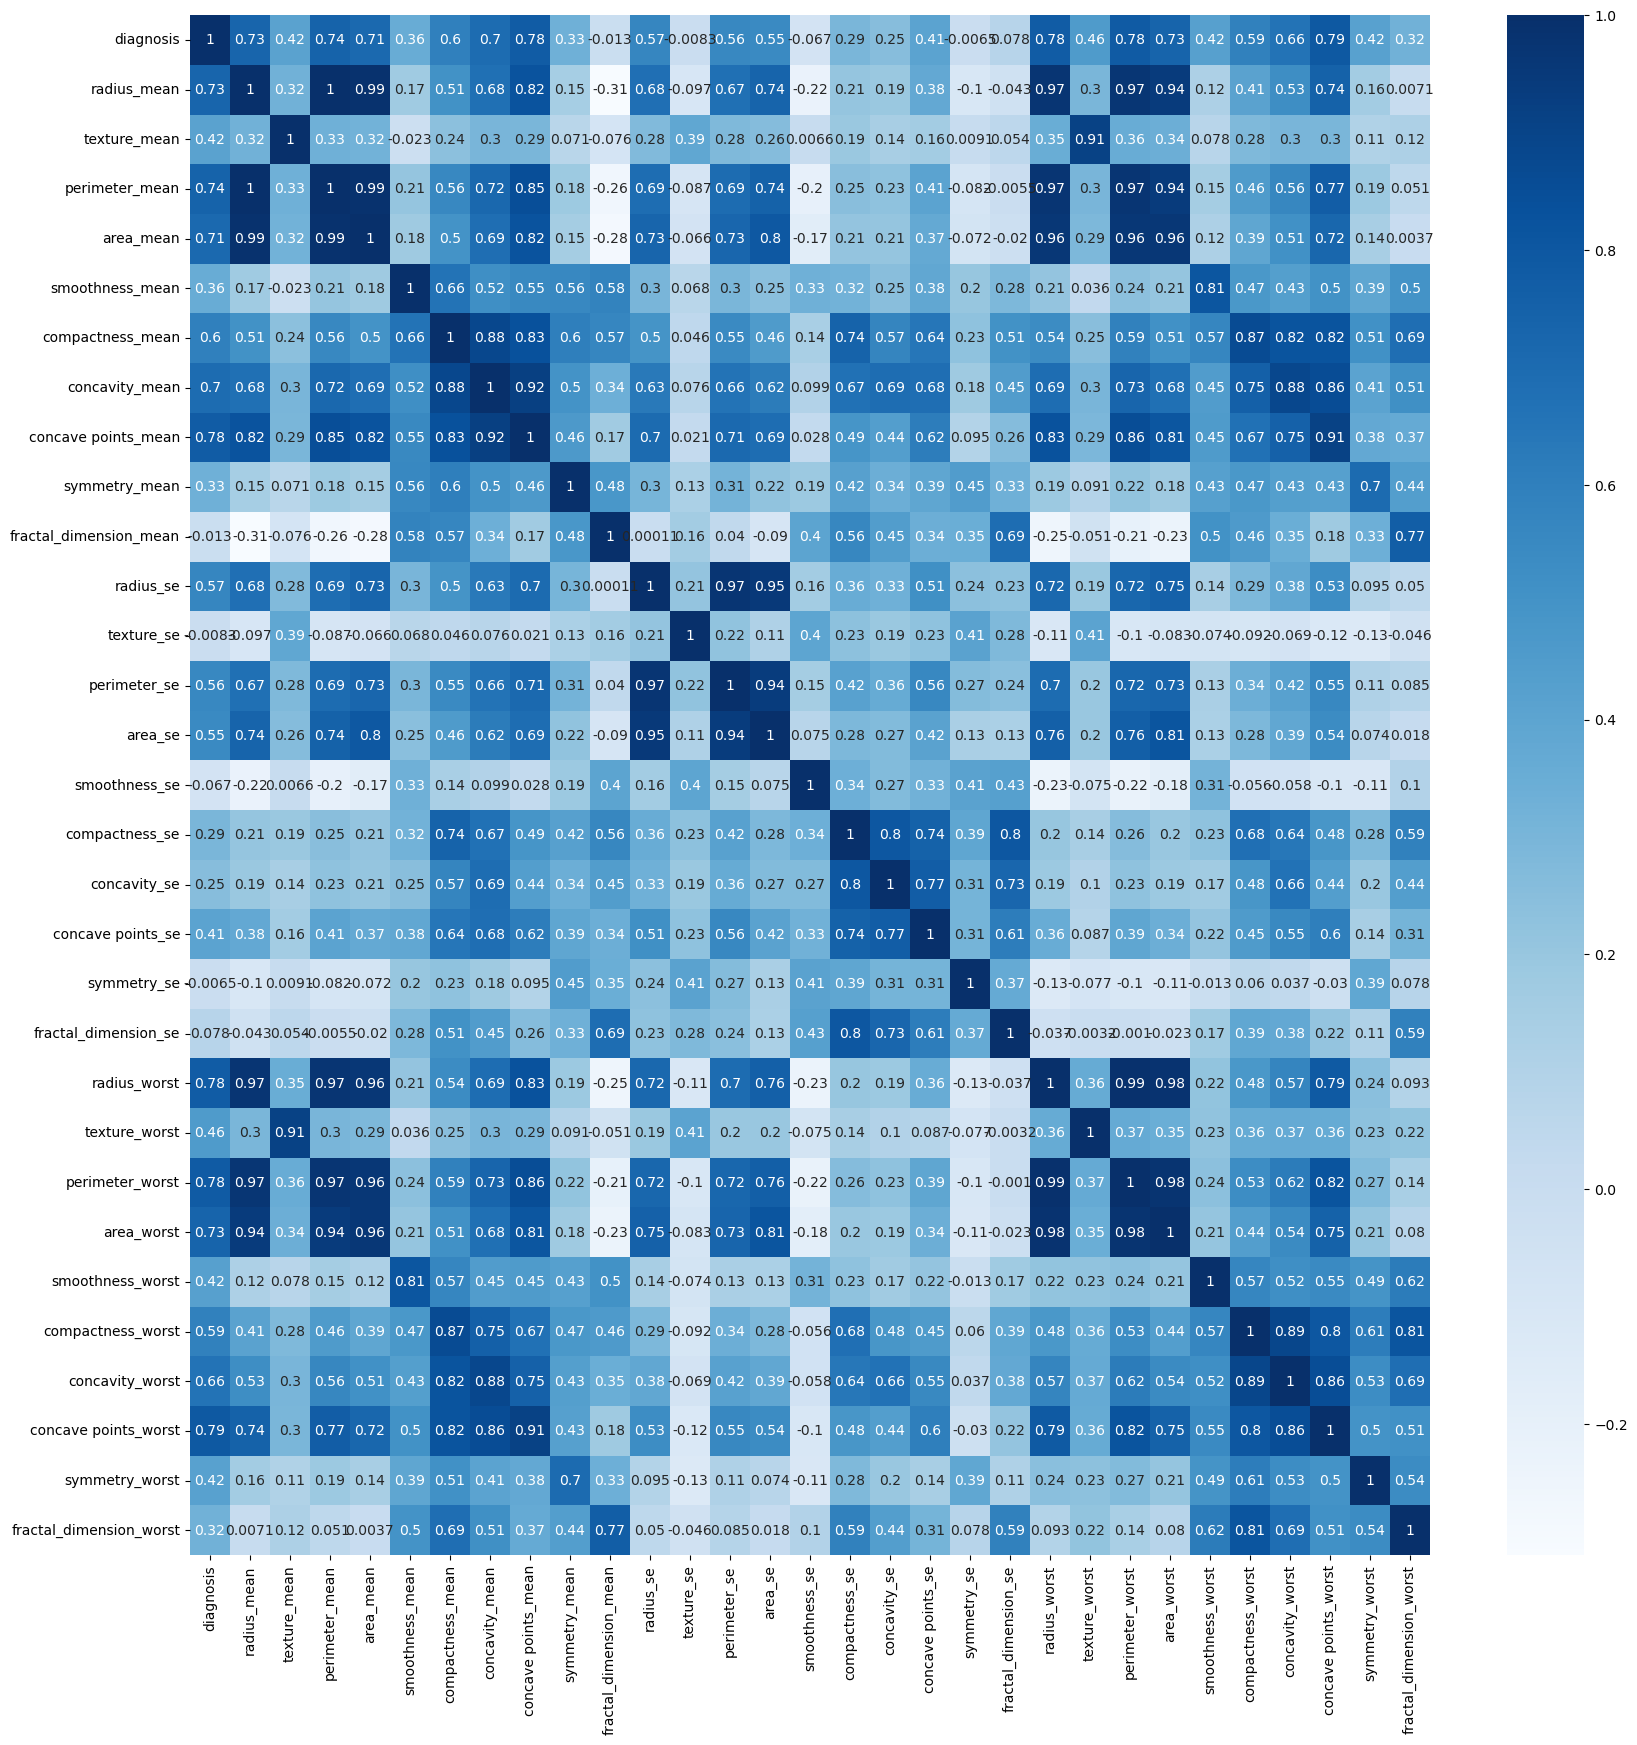

In [858]:
#See correlation of features with target variable 
cmap = 'Blues'
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap=cmap)

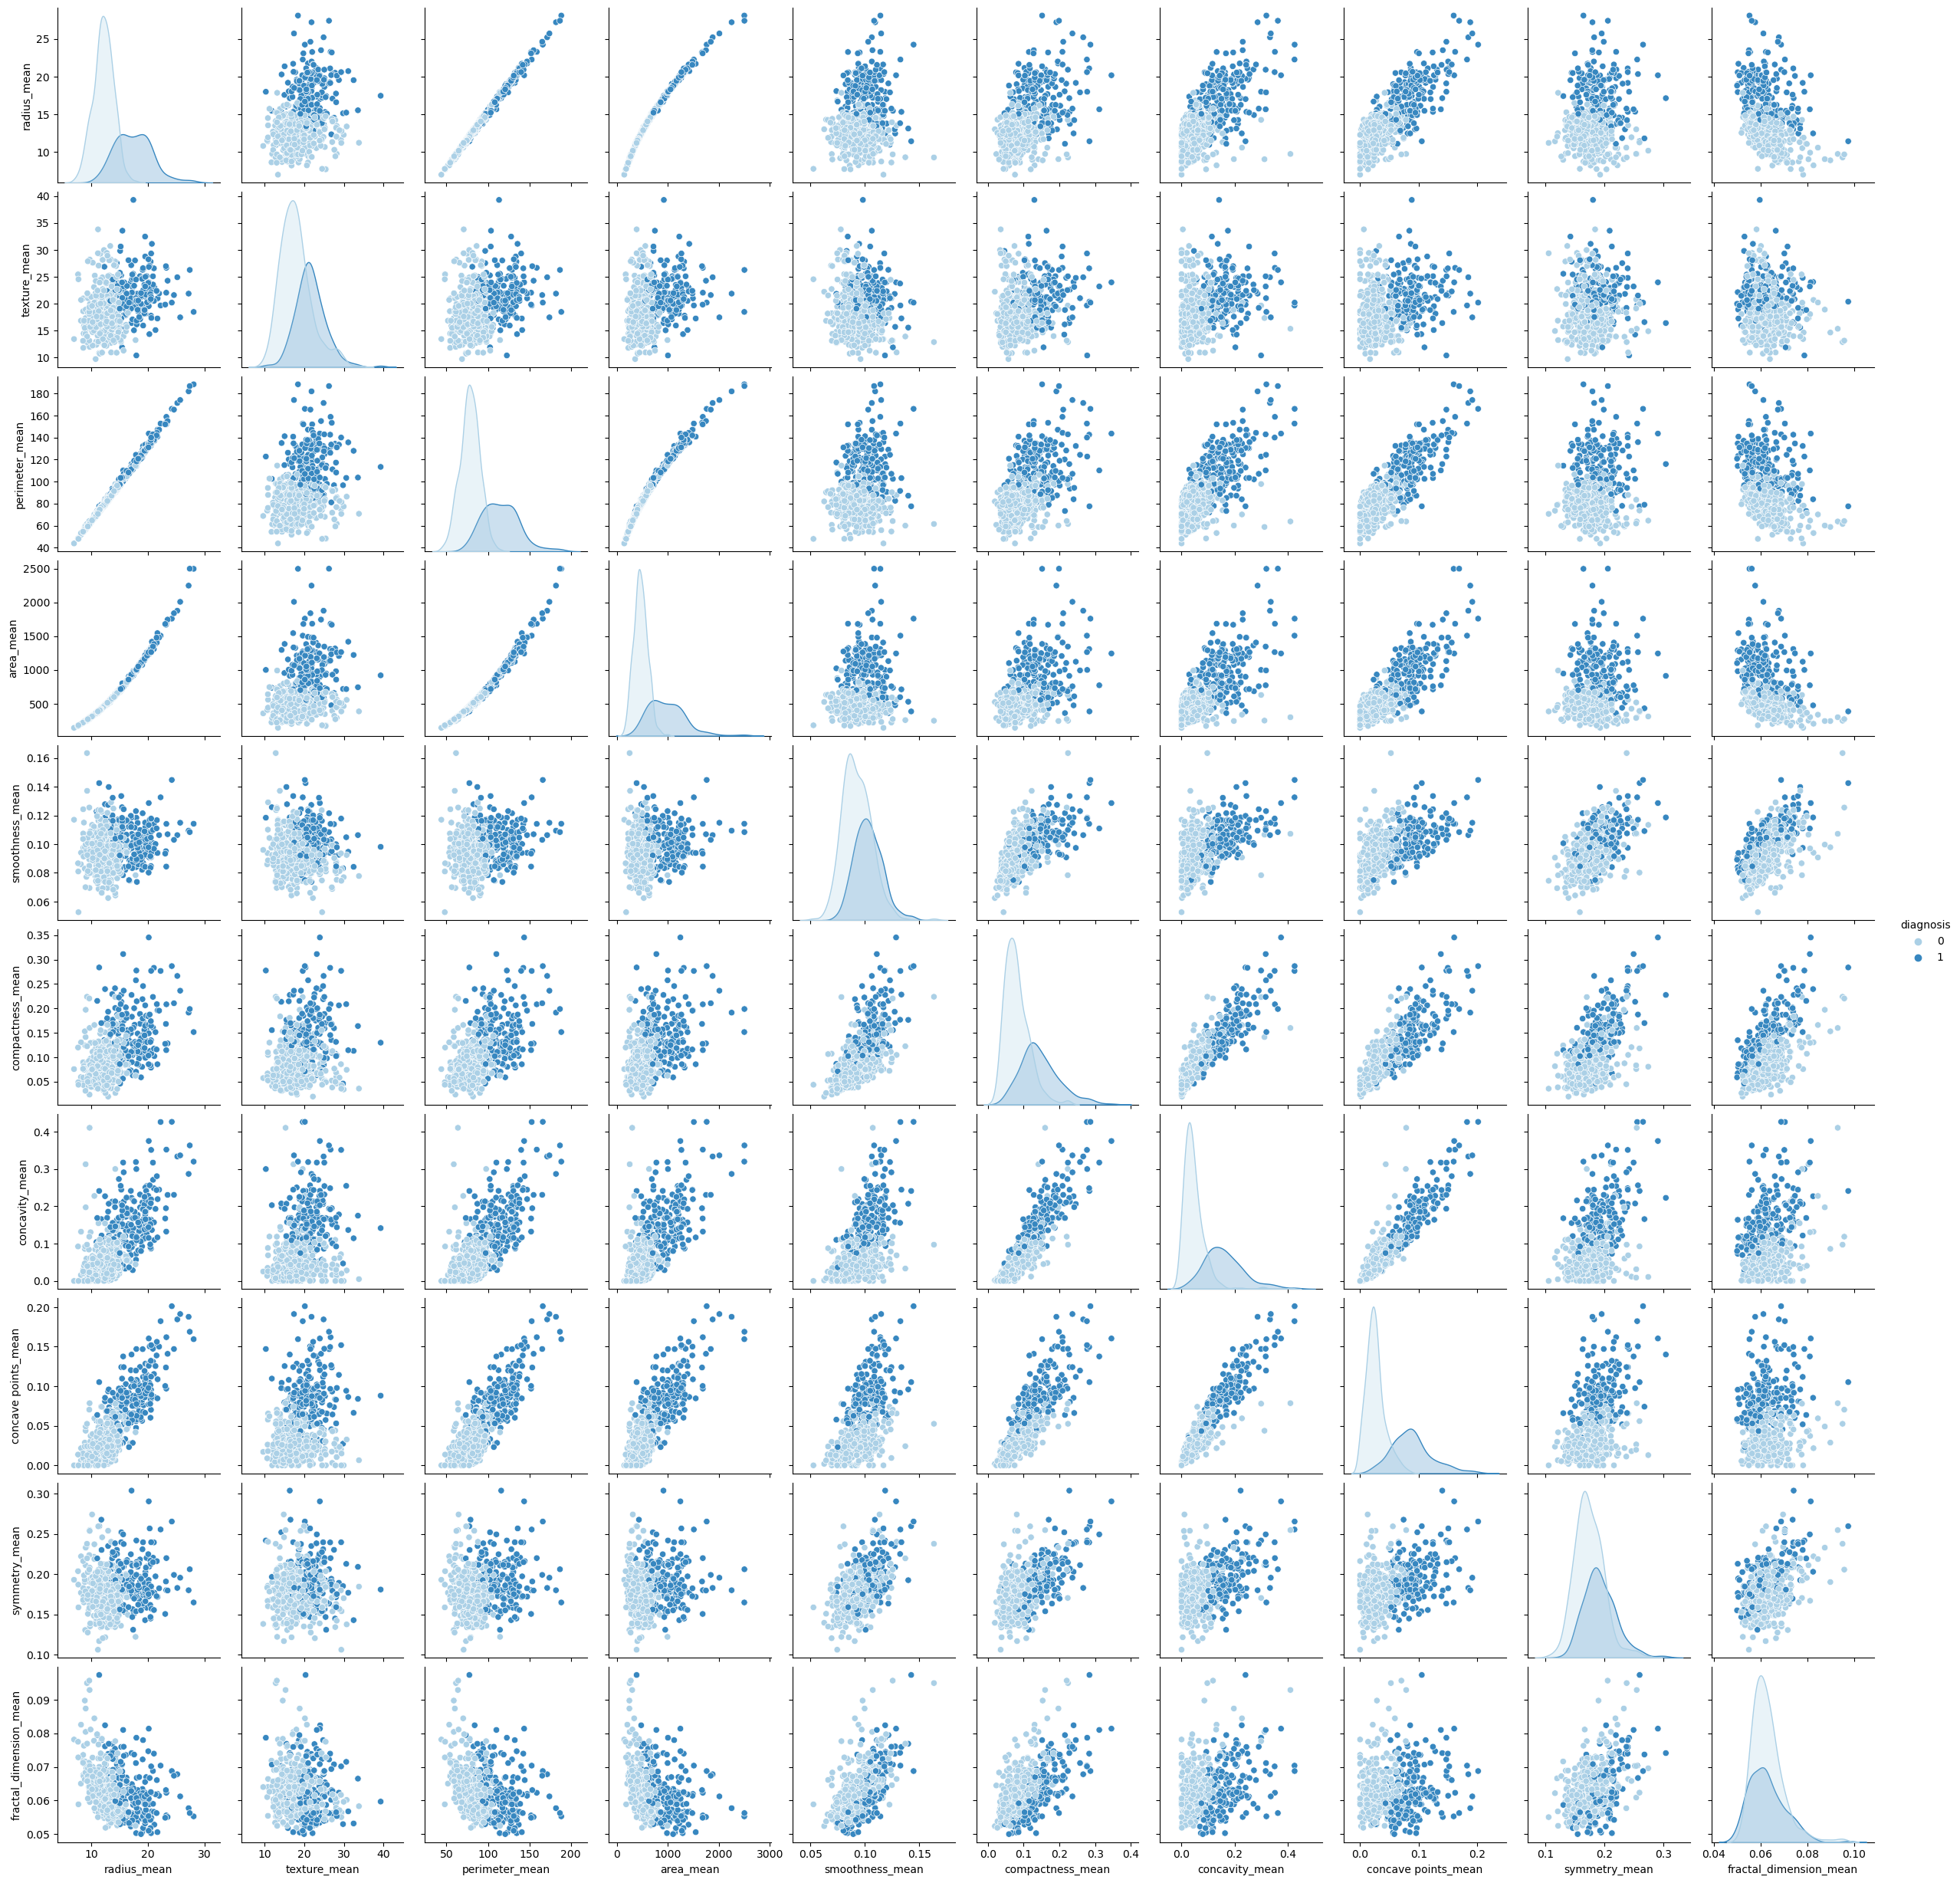

In [859]:
#Generate a scatter plot to visualize correlation
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data=df[cols], hue='diagnosis', palette='Blues')

* Almost perfectly linear patterns between the radius, perimeter and area attributes are hinting at the presence of multicollinearity between these variables. (they are highly linearly related) Another set of variables that possibly imply multicollinearity are the concavity, concave_points and compactness.

In [860]:
#Feature engineering : Drop all columns with very high correlation with exisiting feature > 0.9
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst']
df = df.drop(cols, axis=1)

cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
df = df.drop(cols, axis=1)

cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
df = df.drop(cols, axis=1)

#Verify remaining columns
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

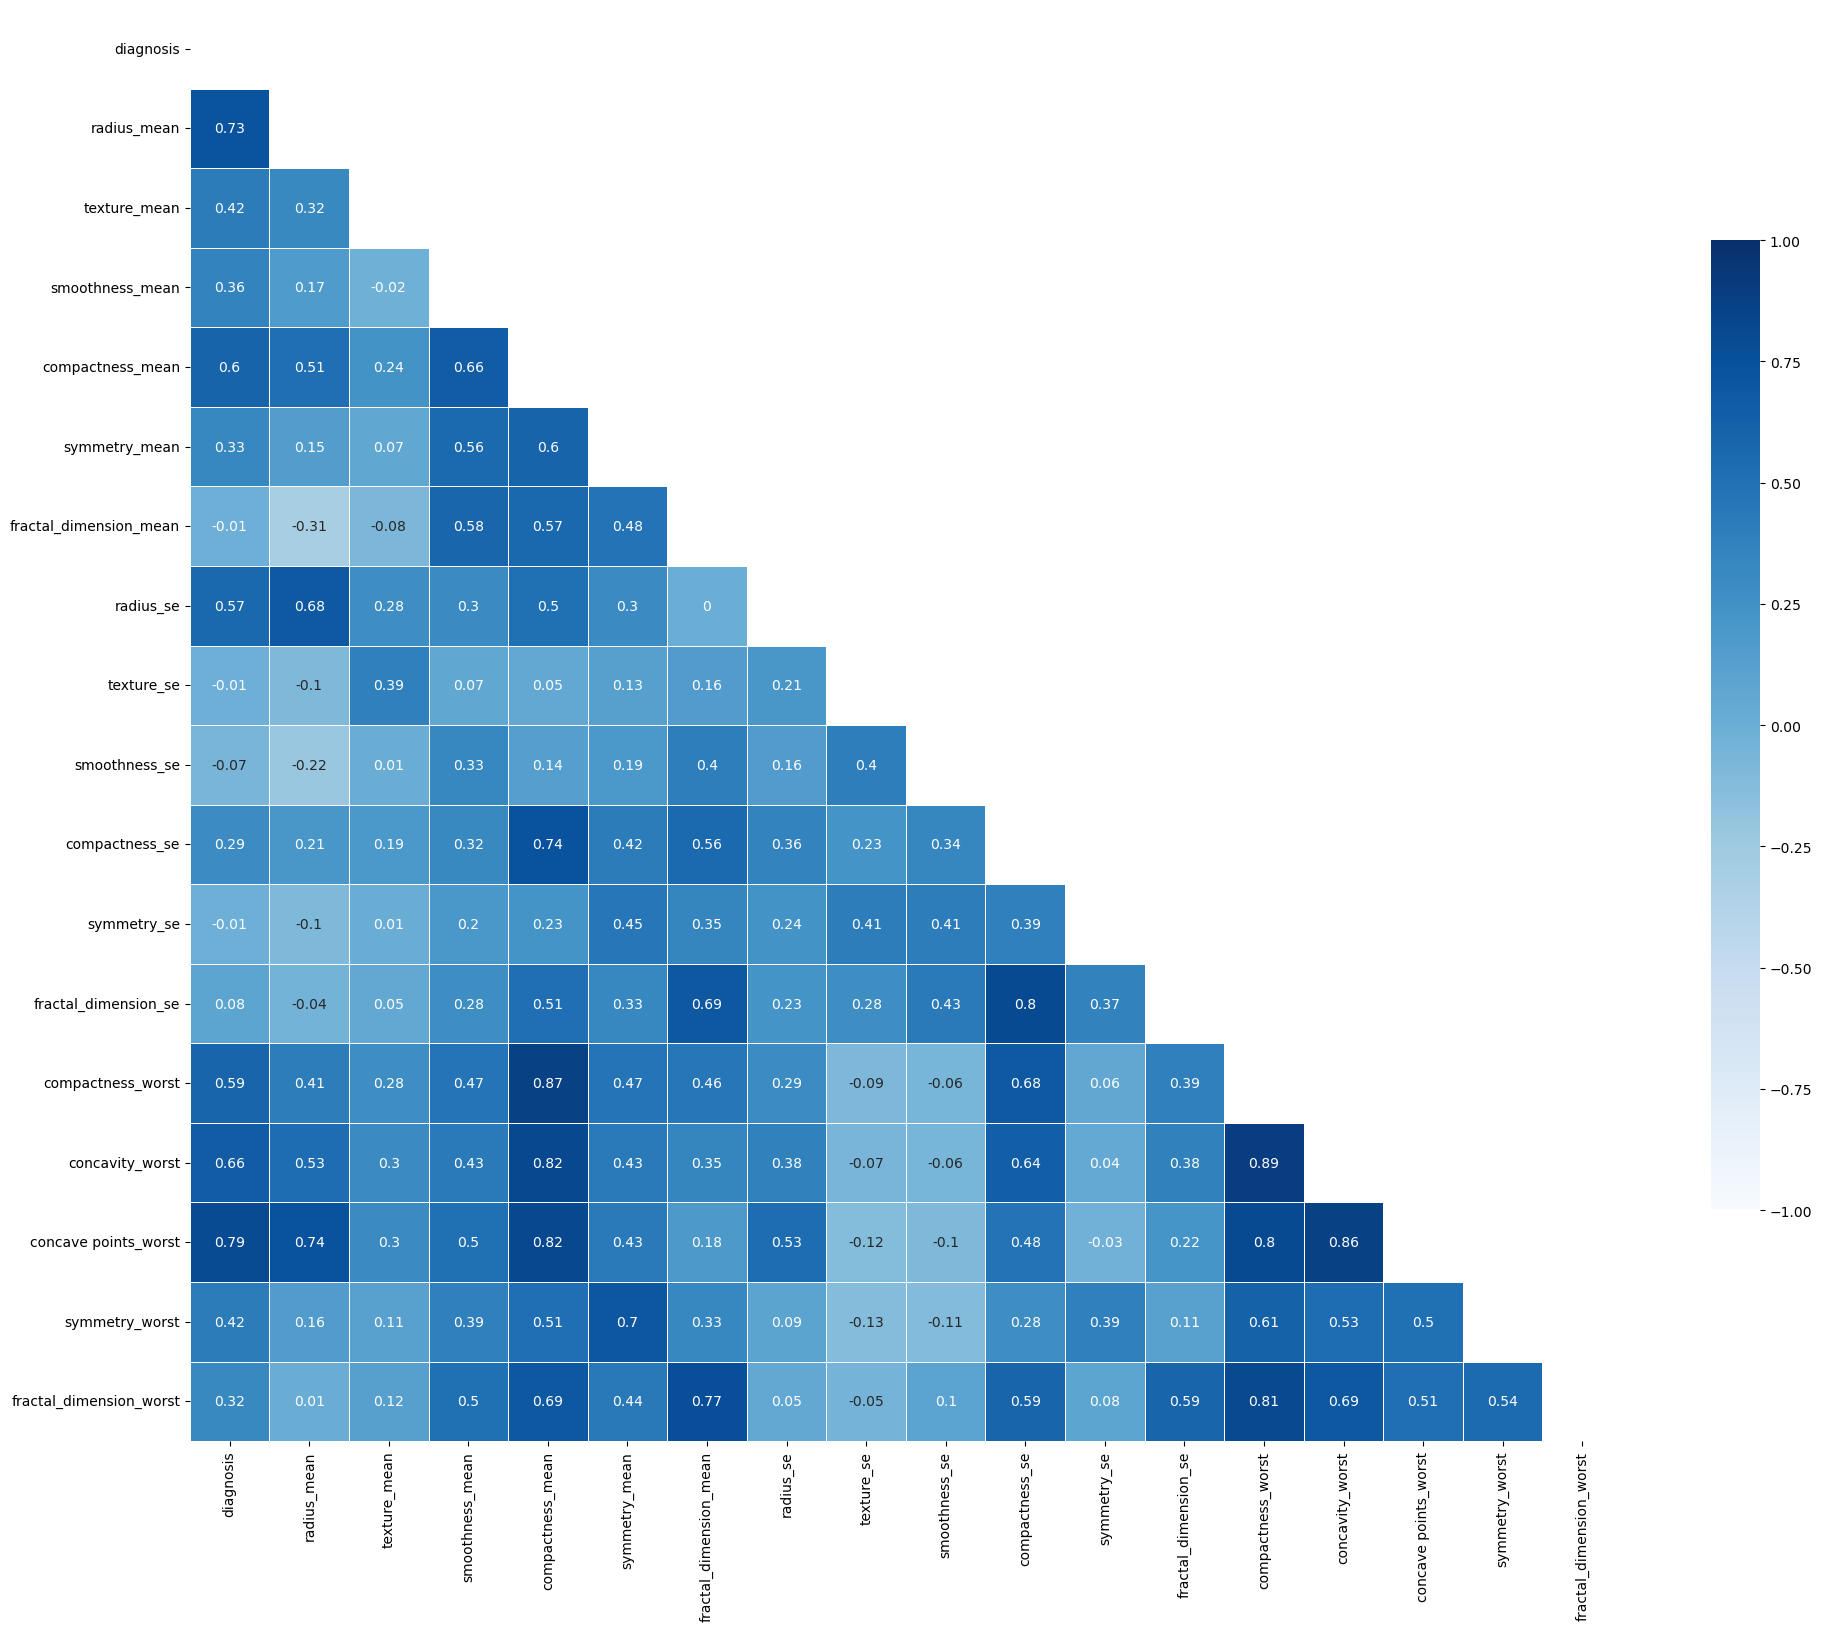

In [861]:
#Draw the heatmap again, with the new correlation matrix
cmap = 'Blues'

corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()
plt.show()

# Splitting features and target

In [862]:
#X for features and Y for target
X = df.drop(columns='diagnosis', axis=1)
Y = df['diagnosis']

In [863]:
print(X)

     radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0          17.99         10.38          0.11840           0.27760   
1          20.57         17.77          0.08474           0.07864   
2          19.69         21.25          0.10960           0.15990   
3          11.42         20.38          0.14250           0.28390   
4          20.29         14.34          0.10030           0.13280   
..           ...           ...              ...               ...   
564        21.56         22.39          0.11100           0.11590   
565        20.13         28.25          0.09780           0.10340   
566        16.60         28.08          0.08455           0.10230   
567        20.60         29.33          0.11780           0.27700   
568         7.76         24.54          0.05263           0.04362   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871     1.0950      0.9053   
1           0.1812               

In [864]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [865]:
#Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [866]:
print(X.shape, X_train.shape, X_test.shape)

(569, 17) (455, 17) (114, 17)


In [867]:
#Scaling data 
ss=StandardScaler()

X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [868]:
# Make test data CSV file -> 

# Assuming X_test and Y_test are numpy arrays or pandas DataFrames
# Convert X_test and Y_test to DataFrames
X_test_df = pd.DataFrame(X_test, columns=X.columns)  
Y_test_df = pd.DataFrame(Y_test, columns=['diagnosis'])  

# Ensure indices are aligned properly
X_test_df.reset_index(drop=True, inplace=True)
Y_test_df.reset_index(drop=True, inplace=True)

# Combine X_test and Y_test into one DataFrame
test_df = pd.concat([X_test_df, Y_test_df], axis=1)

# Save test data to a CSV file
test_df.to_csv('test_data.csv', index=False)

# Build model

# Logistic Regression

In [869]:
model = LogisticRegression()

In [870]:
# Training the model
model.fit(X_train, Y_train)

LogisticRegression()

In [871]:
#Make predictions 
X_test_prediction = model.predict(X_test)

# Logistic Regression Model evaluation

In [872]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data = ', test_data_accuracy*100)

Accuracy on test data =  96.49122807017544


Text(0.5, 1.0, 'Confusion matrix for Logistic Regression')

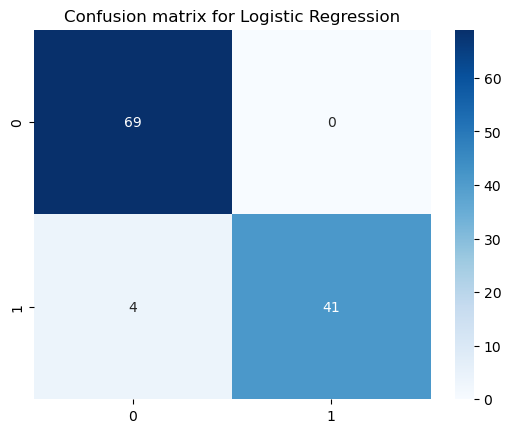

In [873]:
#Draw confusion matrix
cm=confusion_matrix(Y_test,X_test_prediction)
sns.heatmap(cm,annot=True, cmap='Blues')
plt.title("Confusion matrix for Logistic Regression")

In [874]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        69
           1       1.00      0.91      0.95        45

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# Decision Tree

In [875]:
model2 = DecisionTreeClassifier()

In [876]:
#Train model
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [877]:
#Make predictions
prediction2=model2.predict(X_test)

# Decision Tree Model evaluation

In [878]:
test_data_accuracy2 = accuracy_score(Y_test, prediction2)
print('Accuracy on test data = ', test_data_accuracy2*100)

Accuracy on test data =  95.6140350877193


Text(0.5, 1.0, 'Confusion matrix for Decision Tree')

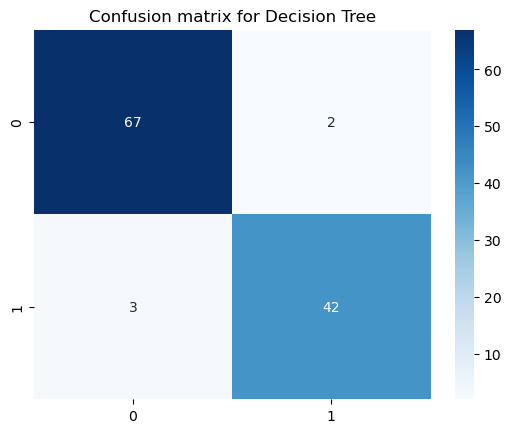

In [879]:
#Draw confusion matrix
cm=confusion_matrix(Y_test,prediction2)
sns.heatmap(cm,annot=True, cmap='Blues')
plt.title("Confusion matrix for Decision Tree")

In [880]:
print(classification_report(Y_test, prediction2))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        69
           1       0.95      0.93      0.94        45

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# XGBoost 

In [881]:
model4 = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [882]:
# Training the model
model4.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None, nthread=1,
              num_parallel_tree=None, ...)

In [883]:
#Make predictions 
prediction4 = model4.predict(X_test)

# XGBoost Model evaluation

In [884]:
test_data_accuracy4 = accuracy_score(Y_test, prediction4)
print('Accuracy on test data = ', test_data_accuracy4*100)

Accuracy on test data =  95.6140350877193


Text(0.5, 1.0, 'Confusion matrix for XGBoost')

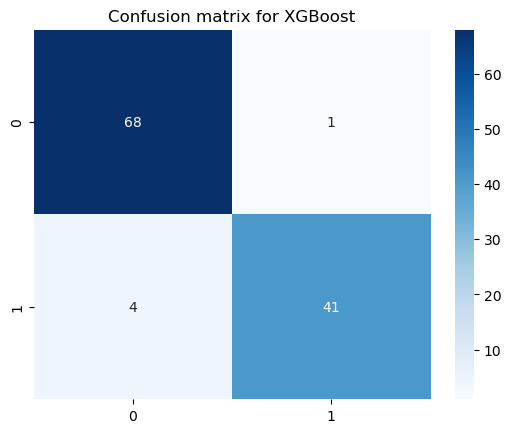

In [885]:
#Draw confusion matrix
cm=confusion_matrix(Y_test,prediction4)
sns.heatmap(cm,annot=True,cmap='Blues')
plt.title("Confusion matrix for XGBoost")

In [886]:
print(classification_report(Y_test, prediction4))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        69
           1       0.98      0.91      0.94        45

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# SVC - Best model and parameter tuning

In [887]:
#Default hyperparameters are best for this model
param_grid = {
    'C': [1.0],  
    'break_ties': [False],  
    'cache_size': [200], 
    'class_weight': [None], 
    'coef0': [0.0],  
    'decision_function_shape': ['ovr'], 
    'degree': [3],
    'gamma': ['scale'], 
    'kernel': ['rbf'], 
    'max_iter': [-1],  
    'probability': [False], 
    'random_state': [None],  
    'shrinking': [True],  
    'tol': [0.001],  
    'verbose': [False]  
}

# Create GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [888]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0], 'break_ties': [False], 'cache_size': [200],
                         'class_weight': [None], 'coef0': [0.0],
                         'decision_function_shape': ['ovr'], 'degree': [3],
                         'gamma': ['scale'], 'kernel': ['rbf'],
                         'max_iter': [-1], 'probability': [False],
                         'random_state': [None], 'shrinking': [True],
                         'tol': [0.001], 'verbose': [False]})

In [889]:
#Make predictions 
prediction5 = grid_search.predict(X_test)

# SVC Model evaluation

In [890]:
test_data_accuracy5 = accuracy_score(Y_test, prediction5)
print('Accuracy on test data = ', test_data_accuracy5*100)

Accuracy on test data =  97.36842105263158


In [891]:
#Draw confusion matrix
cm=confusion_matrix(Y_test,prediction5)
sns.heatmap(cm,annot=True,cmap='Blues')
plt.title("Confusion matrix for SVC")

Text(0.5, 1.0, 'Confusion matrix for SVC')

In [892]:
print(classification_report(Y_test, prediction5))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        69
           1       1.00      0.93      0.97        45

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

